In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('movilidad.csv')

In [3]:
df.head()

,provincia_origen_id,provincia_origen_nombre,departamento_origen_id,departamento_origen_nombre,provincia_destino_id,provincia_destino_nombre,departamento_destino_id,departamento_destino_nombre,migrantes
0,6,Buenos Aires,6007,Adolfo Alsina,2,Ciudad Autónoma de Buenos Aires,2999,Ciudad Autónoma de Buenos Aires,94
1,6,Buenos Aires,6014,Adolfo Gonzales Chaves,2,Ciudad Autónoma de Buenos Aires,2999,Ciudad Autónoma de Buenos Aires,68
2,6,Buenos Aires,6021,Alberti,2,Ciudad Autónoma de Buenos Aires,2999,Ciudad Autónoma de Buenos Aires,152
3,6,Buenos Aires,6028,Almirante Brown,2,Ciudad Autónoma de Buenos Aires,2999,Ciudad Autónoma de Buenos Aires,10725
4,6,Buenos Aires,6035,Avellaneda,2,Ciudad Autónoma de Buenos Aires,2999,Ciudad Autónoma de Buenos Aires,17705


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120617 entries, 0 to 120616
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   provincia_origen_id          120617 non-null  int64 
 1   provincia_origen_nombre      120617 non-null  object
 2   departamento_origen_id       120617 non-null  int64 
 3   departamento_origen_nombre   120617 non-null  object
 4   provincia_destino_id         120617 non-null  int64 
 5   provincia_destino_nombre     120617 non-null  object
 6   departamento_destino_id      120617 non-null  int64 
 7   departamento_destino_nombre  120617 non-null  object
 8   migrantes                    120617 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 8.3+ MB


EDA

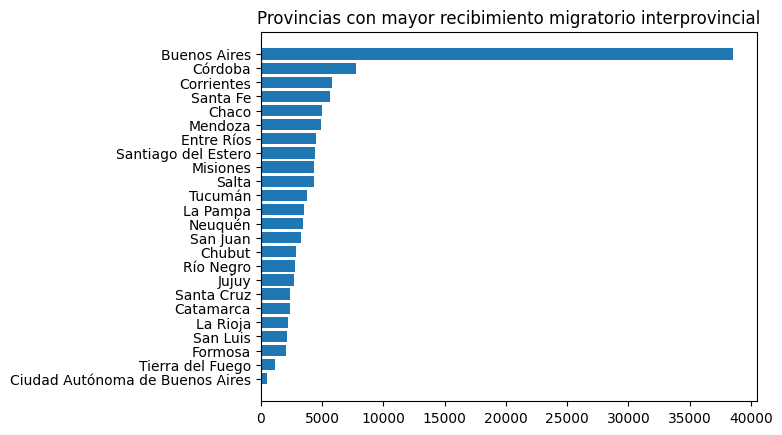

In [5]:
plt.barh(y= df['provincia_destino_nombre'].value_counts().index, width=df['provincia_destino_nombre'].value_counts().values)
plt.title('Provincias con mayor recibimiento migratorio interprovincial')
plt.gca().invert_yaxis()
plt.show()

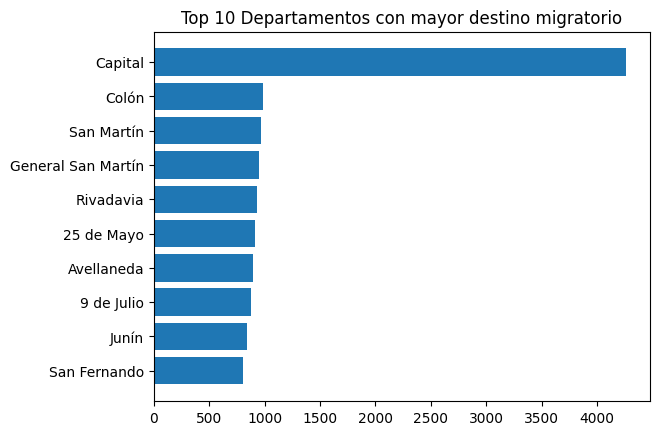

In [6]:
top_10_departamentos = df['departamento_destino_nombre'].value_counts().nlargest(10)

plt.barh(y=top_10_departamentos.index, width=top_10_departamentos.values)
plt.title('Top 10 Departamentos con mayor destino migratorio')
plt.gca().invert_yaxis()
plt.show()

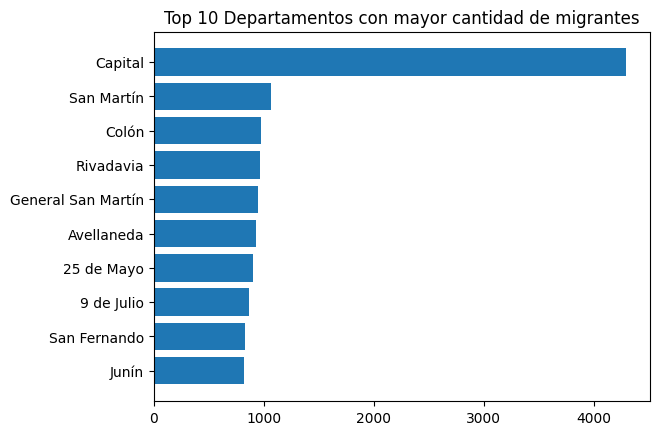

In [7]:
top_10_departamentos_origen = df['departamento_origen_nombre'].value_counts().nlargest(10)

plt.barh(y=top_10_departamentos_origen.index, width=top_10_departamentos_origen.values)
plt.title('Top 10 Departamentos con mayor cantidad de migrantes')
plt.gca().invert_yaxis()
plt.show()

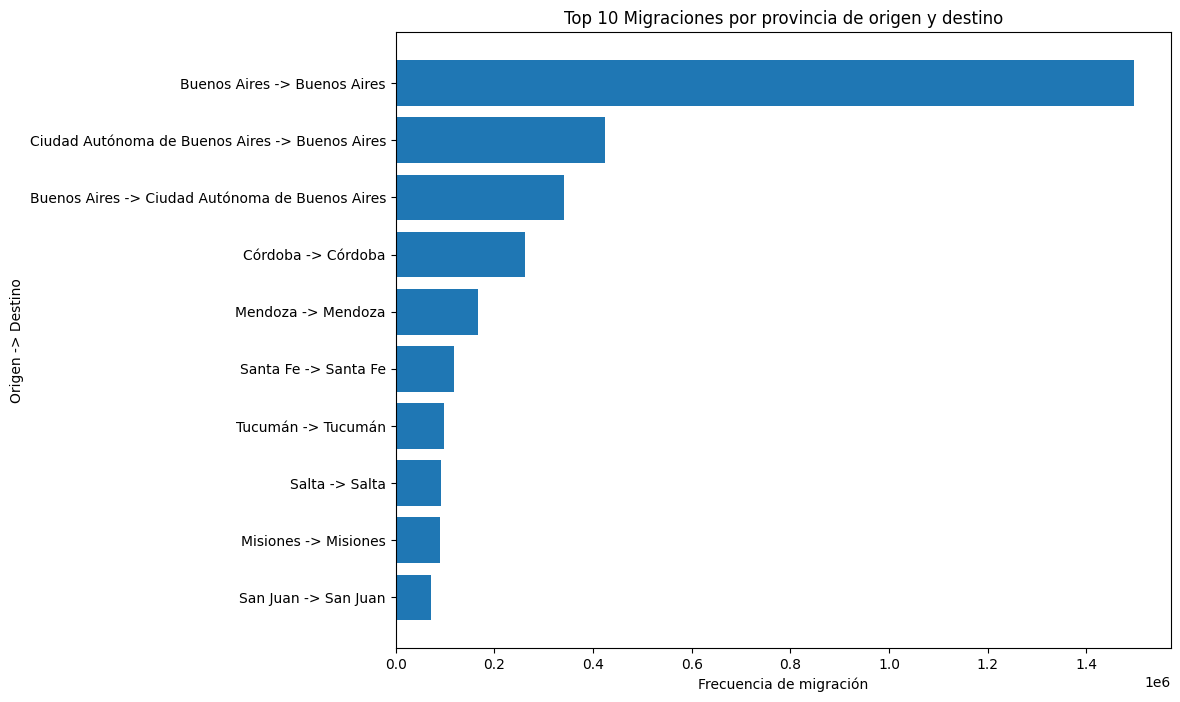

In [8]:
migraciones = df.groupby(['provincia_origen_nombre', 'provincia_destino_nombre'])['migrantes'].sum().reset_index(name='frecuencia')

top_10_migraciones = migraciones.nlargest(10, 'frecuencia')

# Graficar
plt.figure(figsize=(10, 8))
plt.barh(y=range(len(top_10_migraciones)), width=top_10_migraciones['frecuencia'])
plt.yticks(range(len(top_10_migraciones)), [f"{origen} -> {destino}" for origen, destino in zip(top_10_migraciones['provincia_origen_nombre'], top_10_migraciones['provincia_destino_nombre'])])
plt.xlabel('Frecuencia de migración')
plt.ylabel('Origen -> Destino')
plt.title('Top 10 Migraciones por provincia de origen y destino')
plt.gca().invert_yaxis()
plt.show()

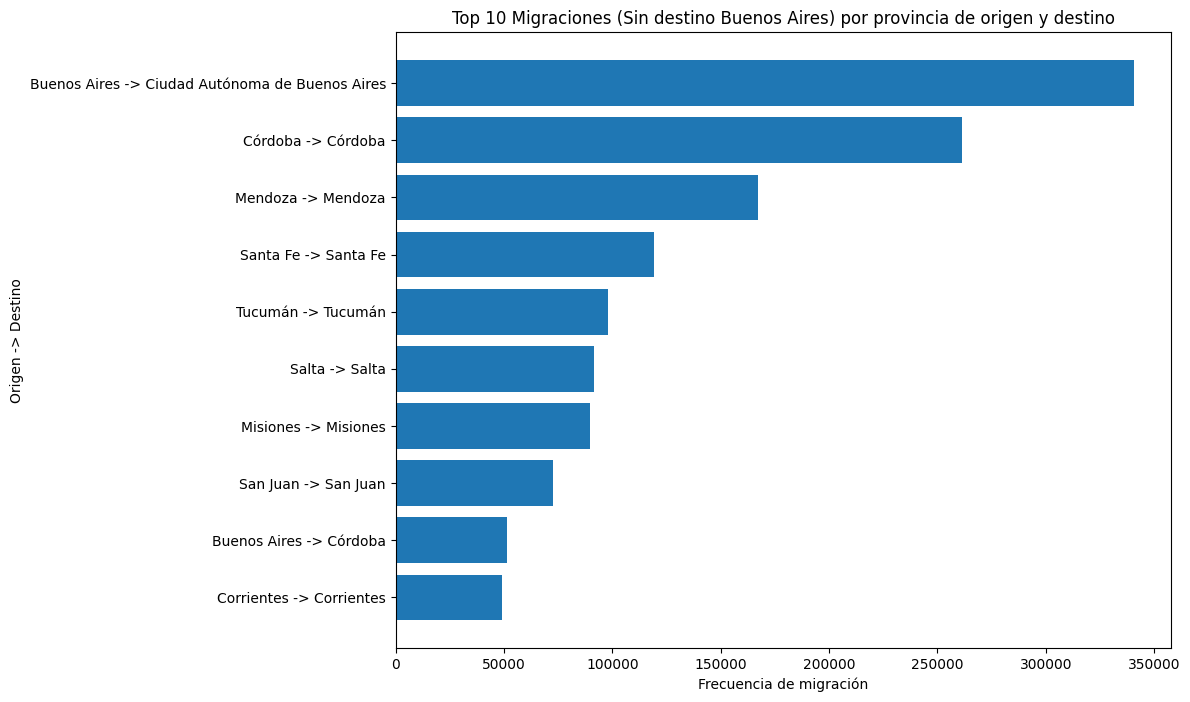

In [9]:
migraciones_no_buenos_aires = df[df['provincia_destino_nombre'] != 'Buenos Aires']

migraciones = migraciones_no_buenos_aires.groupby(['provincia_origen_nombre', 'provincia_destino_nombre'])['migrantes'].sum().reset_index(name='frecuencia')

top_10_migraciones = migraciones.nlargest(10, 'frecuencia')

plt.figure(figsize=(10, 8))
plt.barh(y=range(len(top_10_migraciones)), width=top_10_migraciones['frecuencia'])
plt.yticks(range(len(top_10_migraciones)), [f"{origen} -> {destino}" for origen, destino in zip(top_10_migraciones['provincia_origen_nombre'], top_10_migraciones['provincia_destino_nombre'])])
plt.xlabel('Frecuencia de migración')
plt.ylabel('Origen -> Destino')
plt.title('Top 10 Migraciones (Sin destino Buenos Aires) por provincia de origen y destino')
plt.gca().invert_yaxis()
plt.show()

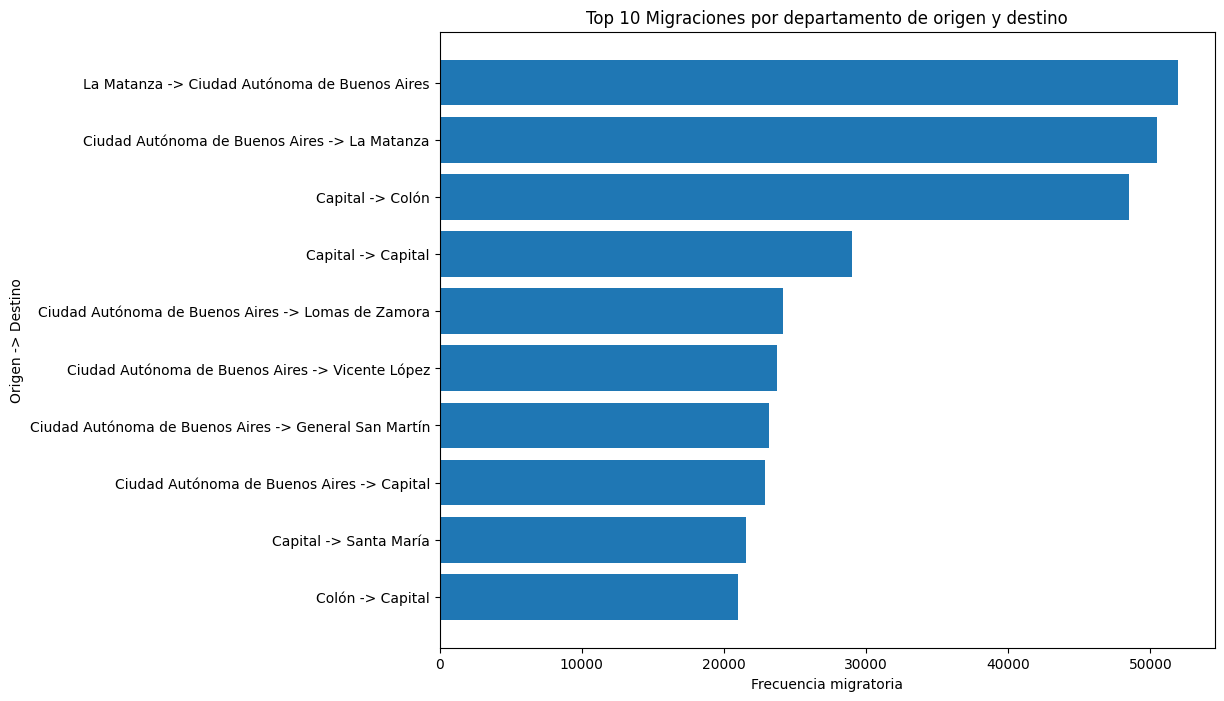

In [10]:
migraciones_dep = df.groupby(['departamento_origen_nombre', 'departamento_destino_nombre'])['migrantes'].sum().reset_index(name='frecuencia')

top_10_migraciones_dep = migraciones_dep.nlargest(10, 'frecuencia')

# Graficar
plt.figure(figsize=(10, 8))
plt.barh(y=range(len(top_10_migraciones_dep)), width=top_10_migraciones_dep['frecuencia'])
plt.yticks(range(len(top_10_migraciones_dep)), [f"{origen} -> {destino}" for origen, destino in zip(top_10_migraciones_dep['departamento_origen_nombre'], top_10_migraciones_dep['departamento_destino_nombre'])])
plt.xlabel('Frecuencia migratoria')
plt.ylabel('Origen -> Destino')
plt.title('Top 10 Migraciones por departamento de origen y destino')
plt.gca().invert_yaxis()
plt.show()

In [11]:
import plotly.graph_objects as go
import random

In [12]:
migraciones_no_self = df[df['provincia_origen_nombre'] != df['provincia_destino_nombre']]

migraciones_agrupadas = migraciones_no_self.groupby(['provincia_origen_nombre', 'provincia_destino_nombre'])['migrantes'].sum().reset_index()

top_10_migraciones = migraciones_agrupadas.nlargest(10, 'migrantes')

provincias = set(top_10_migraciones['provincia_origen_nombre'].unique()) | set(top_10_migraciones['provincia_destino_nombre'].unique())

colores = {}
for provincia in provincias:
    colores[provincia] = f'rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})'

#Grafico
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=top_10_migraciones['provincia_origen_nombre'].unique().tolist() + top_10_migraciones['provincia_destino_nombre'].unique().tolist(),
        color=[colores[provincia] for provincia in top_10_migraciones['provincia_origen_nombre'].unique().tolist()] + [colores[provincia] for provincia in top_10_migraciones['provincia_destino_nombre'].unique().tolist()],
    ),
    link=dict(
        source=[top_10_migraciones['provincia_origen_nombre'].unique().tolist().index(origen) for origen in top_10_migraciones['provincia_origen_nombre']],
        target=[len(top_10_migraciones['provincia_origen_nombre'].unique().tolist()) + top_10_migraciones['provincia_destino_nombre'].unique().tolist().index(destino) for destino in top_10_migraciones['provincia_destino_nombre']],  # índice de la provincia de destino
        value=top_10_migraciones['migrantes'],
    ),
    arrangement="snap",
)])

fig.update_layout(title_text="Top 10 Flujos migratorios entre provincias (excluyendo flujos internos)",
                  font_size=15,
                  template="ggplot2")

fig.show()